In [1]:
import torch
import numpy as np
import torchvision
import torchvision.datasets as datasets
import pandas as pd
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import plot_confusion_matrix
import random

random.seed(1)

In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
train_len = len(trainset)
test_len = len(testset)
index = list(range(train_len))
print(train_len, test_len)

50000 10000


In [4]:
#construct validation set (lets use 10 percent)
np.random.shuffle(index)
#number of blocks of data
split = int(0.4* train_len)
set1_index = index[0:split]
set2_index = index[split:2*split]
val_index = index[2*split:]
#Need to use a dataloader to control batch size and also enable SGD
set1_loader = torch.utils.data.DataLoader(trainset, sampler = set1_index, batch_size = 10, num_workers = 10)
set2_loader = torch.utils.data.DataLoader(trainset, sampler = set2_index, batch_size = 10, num_workers = 10)
val_loader = torch.utils.data.DataLoader(trainset, sampler = val_index,batch_size = 10, num_workers = 10)
test_loader = torch.utils.data.DataLoader(testset)

In [5]:
print(len(set1_index))
print(len(set2_index))
print(len(val_index))

20000
20000
10000


In [8]:
#dataset only for testing don't run this piece of code if it's not necessary
split = int(0.2*train_len)
set1_index = index[0:split]
set2_index = index[split:2*split]
val_index = index[2*split:3*split]
index2 = list(range(test_len))
np.random.shuffle(index2)
split2 = int(0.03 * test_len)
test_index = index2[0:split2]
print(len(set1_index))
print(len(set2_index))
print(len(test_index))
set1_loader = torch.utils.data.DataLoader(trainset, sampler = set1_index, batch_size = 10, num_workers = 10)
set2_loader = torch.utils.data.DataLoader(trainset, sampler = set2_index, batch_size = 10, num_workers = 10)
val_loader = torch.utils.data.DataLoader(trainset, sampler = val_index, batch_size = 10, num_workers = 10)
test_loader = torch.utils.data.DataLoader(testset, sampler = test_index)

10000
10000
300


In [6]:
set1dataiter = iter(set1_loader)
set1images, set1labels = set1dataiter.next()
set2dataiter = iter(set2_loader)
set2images, set2labels = set2dataiter.next()
valdataiter = iter(val_loader)
valimages, vallabels = valdataiter.next()

In [7]:
class CNNBlock1(nn.Module):
    def __init__(self):
        super(CNNBlock1, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size = 3)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(F.max_pool2d(self.conv2(x),2))
        return x
cnnblock1 = CNNBlock1()

In [8]:
class CNNBlock2(nn.Module):
    def __init__(self):
        super(CNNBlock2, self).__init__()
        self.conv3 = nn.Conv2d(128, 128, kernel_size = 3, padding = 1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size = 4, padding = 1)
    
    def forward(self, x):
        x = F.relu(self.conv3(x))
        x = F.relu(F.max_pool2d(self.conv4(x),2))
        return x
cnnblock2 = CNNBlock2()

In [9]:
class CNNBlock3(nn.Module):
    def __init__(self):
        super(CNNBlock3, self).__init__()
        self.conv5 = nn.Conv2d(256, 256, kernel_size = 3, padding = 1)
        self.conv6 = nn.Conv2d(256, 512, kernel_size = 2)
    
    def forward(self, x):
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        return x
cnnblock3 = CNNBlock3()

In [10]:
class MLPBlock1(nn.Module):
    def __init__(self):
        super(MLPBlock1, self).__init__()
        self.fc1 = nn.Linear(15*15*128, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(-1, 15*15*128)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
mlpblock1 = MLPBlock1()

In [11]:
class MLPBlock2(nn.Module):
    def __init__(self):
        super(MLPBlock2, self).__init__()
        self.fc4 = nn.Linear(7*7*256, 256)
        self.fc5 = nn.Linear(256, 64)
        self.fc6 = nn.Linear(64,10)
    
    def forward(self, x):
        x = x.view(-1, 7*7*256)
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return x
mlpblock2 = MLPBlock2()

In [12]:
class MLPBlock3(nn.Module):
    def __init__(self):
        super(MLPBlock3, self).__init__()
        self.fc7 = nn.Linear(6*6*512, 256)
        self.fc8 = nn.Linear(256, 64)
        self.fc9 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(-1, 6*6*512)
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = self.fc9(x)
        return x
mlpblock3 = MLPBlock3()

In [13]:
class EnsembleModel(nn.Module):
    def __init__(self):
        super(EnsembleModel, self).__init__()
        self.cnnblock1 = cnnblock1
        self.cnnblock2 = cnnblock2
        self.cnnblock3 = cnnblock3
        self.mlpblock1 = mlpblock1
        self.mlpblock2 = mlpblock2
        self.mlpblock3 = mlpblock3
    
    def forward(self, x):
        x1 = self.cnnblock1(x)
        x2 = self.cnnblock2(x1)
        x3 = self.cnnblock3(x2)
        x4 = self.mlpblock1(x1)
        x5 = self.mlpblock2(x2)
        x6 = self.mlpblock3(x3)
        x7 = x4 + x5 + x6
        return F.log_softmax(x7, dim=1)

ensemblemodel = EnsembleModel()

In [14]:
optimizer = optim.SGD(ensemblemodel.parameters(), lr = 0.05)

In [15]:
criterion = nn.CrossEntropyLoss()

In [16]:
trainingloss = []
trainingloss_noisy = []
validationloss = []
testaccuracy = []
for epoch in range(51):

    if epoch % 2 == 0:
        for param in cnnblock1.parameters():
            param.requires_grad_(False)
        
        for param in cnnblock2.parameters():
            param.requires_grad_(False)
        
        for param in cnnblock3.parameters():
            param.requires_grad_(False)
        
        for param in mlpblock1.parameters():
            param.requires_grad_(True)
            
        for param in mlpblock2.parameters():
            param.requires_grad_(True)
            
        for param in mlpblock3.parameters():
            param.requires_grad_(True)
        
        running_loss = 0.0
        for i, data in enumerate(set2_loader,0):
            inputs, set2labels = data
            
            optimizer.zero_grad()
            
            outputs = ensemblemodel(inputs)
            loss = criterion(outputs, set2labels)
            loss.backward()
            optimizer.step()
            
            #print stats
            running_loss += loss.item()
            if i%2000 == 1999:
                print('[%d,%5d] training loss: %.3f' % (epoch+1, i + 1, running_loss / 2000))
                trainingloss.append(running_loss/2000)
                trainingloss_noisy.append(running_loss/2000)
                running_loss = 0.0
                
                
    else:
        for param in cnnblock1.parameters():
            param.requires_grad_(True)
        
        for param in cnnblock2.parameters():
            param.requires_grad_(True)
        
        for param in cnnblock3.parameters():
            param.requires_grad_(True)
        
        for param in mlpblock1.parameters():
            param.requires_grad_(False)
            
        for param in mlpblock2.parameters():
            param.requires_grad_(False)
            
        for param in mlpblock3.parameters():
            param.requires_grad_(False)
        
        running_loss = 0.0
        
        for i, data in enumerate(set1_loader,0):
            inputs, set1labels = data
            
            optimizer.zero_grad()
            
            outputs = ensemblemodel(inputs)
            loss = criterion(outputs, set1labels)
            loss.backward()
            optimizer.step()
            
            #print stats
            running_loss += loss.item()
            if i%2000 == 1999:
                print('[%d,%5d] training loss: %.3f' % (epoch+1, i + 1, running_loss / 2000))
                trainingloss_noisy.append(running_loss/2000)
                running_loss = 0.0
                

    running_loss2 = 0.0
    
    for i, data in enumerate(val_loader):
            inputs,vallabels = data
            outputs = ensemblemodel(inputs)
            lloss = criterion(outputs, vallabels)
            
            running_loss2 += lloss.item()
            if i%2000 == 1999:
                print('[%d,%5d] validation loss: %.3f' % (epoch+1, i + 1, running_loss2 / 2000))
                validationloss.append(running_loss2/2000)
                running_loss2 = 0.0
                
                
    correct_count, all_count = 0, 0
    for inp,labels in test_loader:
      for i in range(len(labels)):
        with torch.no_grad():
            logps = ensemblemodel(inp)

    
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
          correct_count += 1
        all_count += 1

    print("\nModel Accuracy =", (correct_count/all_count))
    testaccuracy.append(correct_count/all_count)
                
                
print('Finished Training')

/home/brian_chen/anaconda3/lib/python3.7/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370141920/work/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


[1, 2000] training loss: 1.835

Model Accuracy = 0.4067
[2, 2000] training loss: 1.562

Model Accuracy = 0.4687
[3, 2000] training loss: 1.491

Model Accuracy = 0.5148
[4, 2000] training loss: 1.330

Model Accuracy = 0.5409
[5, 2000] training loss: 1.221

Model Accuracy = 0.5686
[6, 2000] training loss: 1.209

Model Accuracy = 0.5754
[7, 2000] training loss: 1.046

Model Accuracy = 0.5845
[8, 2000] training loss: 1.188

Model Accuracy = 0.5751
[9, 2000] training loss: 0.914

Model Accuracy = 0.5935
[10, 2000] training loss: 1.178

Model Accuracy = 0.5804
[11, 2000] training loss: 0.862

Model Accuracy = 0.6119
[12, 2000] training loss: 1.151

Model Accuracy = 0.6023
[13, 2000] training loss: 0.647

Model Accuracy = 0.6229
[14, 2000] training loss: 1.198

Model Accuracy = 0.618
[15, 2000] training loss: 0.586

Model Accuracy = 0.626
[16, 2000] training loss: 1.286

Model Accuracy = 0.5799
[17, 2000] training loss: 0.684

Model Accuracy = 0.6015
[18, 2000] training loss: 1.277

Model Acc

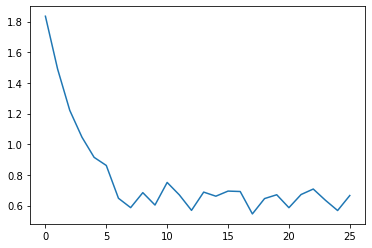

In [17]:
plt.plot(trainingloss)

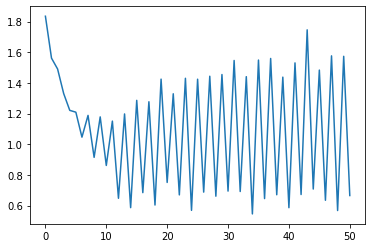

In [18]:
plt.plot(trainingloss_noisy)

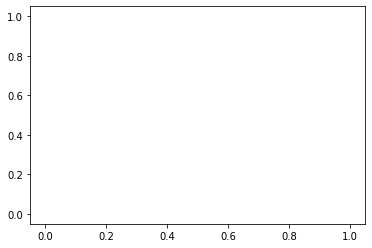

In [19]:
plt.plot(validationloss)

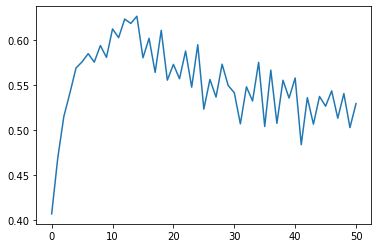

In [20]:
plt.plot(testaccuracy)

In [21]:
correct_count, all_count = 0, 0
pred = []
real = []
for inp,labels in test_loader:
  for i in range(len(labels)):
    with torch.no_grad():
        logps = ensemblemodel(inp)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    pred.append(pred_label)
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1
    real.append(true_label)

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))
print(pred)
print(real)

Number Of Images Tested = 10000

Model Accuracy = 0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [22]:
sk.metrics.confusion_matrix(real,pred, list(range(10)), sample_weight = None, normalize = None)

array([[1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [21]:
class EnsembleModel2(nn.Module):
    def __init__(self):
        super(EnsembleModel2, self).__init__()
        self.cnnblock1 = cnnblock1
        self.cnnblock2 = cnnblock2
        self.cnnblock3 = cnnblock3
        self.mlpblock1 = mlpblock1
        self.mlpblock2 = mlpblock2
        self.mlpblock3 = mlpblock3
    
    def forward(self, x):
        x1 = self.cnnblock1(x)
        x2 = self.cnnblock2(x1)
        x3 = self.cnnblock3(x2)
        x4 = self.mlpblock1(x1)
        x5 = self.mlpblock2(x2)
        x6 = self.mlpblock3(x3)
        x7 = x4 + x5 + x6
        return F.log_softmax(x7, dim=1)

ensemblemodel2 = EnsembleModel2()

In [22]:
optimizer2 = optim.SGD(ensemblemodel2.parameters(), lr = 0.05)

In [23]:
trainingloss2 = []
validationloss2 = []
testaccuracy2 = []
for epoch in range(51):
    
    if epoch % 2 == 0:
        for param in cnnblock1.parameters():
            param.requires_grad_(True)
        
        for param in cnnblock2.parameters():
            param.requires_grad_(True)
        
        for param in cnnblock3.parameters():
            param.requires_grad_(True)
        
        for param in mlpblock1.parameters():
            param.requires_grad_(True)
            
        for param in mlpblock2.parameters():
            param.requires_grad_(True)
            
        for param in mlpblock3.parameters():
            param.requires_grad_(True)
        
        running_loss = 0.0
        for i, data in enumerate(set2_loader,0):
            inputs, set2labels = data
            
            optimizer2.zero_grad()
            
            outputs = ensemblemodel2(inputs)
            loss = criterion(outputs, set2labels)
            loss.backward()
            optimizer2.step()
            
            #print stats
            running_loss += loss.item()
            if i%2000 == 1999:
                print('[%d,%5d] loss: %.3f' % (epoch+1, i + 1, running_loss / 2000))
                running_loss = 0.0
                
    else:
        for param in cnnblock1.parameters():
            param.requires_grad_(True)
        
        for param in cnnblock2.parameters():
            param.requires_grad_(True)
        
        for param in cnnblock3.parameters():
            param.requires_grad_(True)
        
        for param in mlpblock1.parameters():
            param.requires_grad_(True)
            
        for param in mlpblock2.parameters():
            param.requires_grad_(True)
            
        for param in mlpblock3.parameters():
            param.requires_grad_(True)
        
        running_loss = 0.0
        
        for i, data in enumerate(set2_loader,0):
            inputs, set1labels = data
            
            optimizer2.zero_grad()
            
            outputs = ensemblemodel2(inputs)
            loss = criterion(outputs, set1labels)
            loss.backward()
            optimizer2.step()
            
            #print stats
            running_loss += loss.item()
            if i%2000 == 1999:
                print('[%d,%5d] loss: %.3f' % (epoch+1, i + 1, running_loss / 2000))
                trainingloss2.append(running_loss/2000)
                running_loss = 0.0

    running_loss2 = 0.0
    
    for i, data in enumerate(val_loader):
            inputs,vallabels = data
            outputs = ensemblemodel2(inputs)
            lloss = criterion(outputs, vallabels)
            
            running_loss2 += lloss.item()
            if i%2000 == 1999:
                print('[%d,%5d] validation loss: %.3f' % (epoch+1, i + 1, running_loss2 / 2000))
                validationloss2.append(running_loss2/2000)
                running_loss2 = 0.0
    
    
    
    correct_count, all_count = 0, 0
    for inp,labels in test_loader:
      for i in range(len(labels)):
        with torch.no_grad():
            logps = ensemblemodel2(inp)

    
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
          correct_count += 1
        all_count += 1

    print("\nModel Accuracy =", (correct_count/all_count))
    testaccuracy2.append(correct_count/all_count)                
                
                
print('Finished Training')

[1, 2000] loss: 0.173

Model Accuracy = 0.6126
[2, 2000] loss: 0.072

Model Accuracy = 0.6329
[3, 2000] loss: 0.035

Model Accuracy = 0.6381
[4, 2000] loss: 0.018

Model Accuracy = 0.6382
[5, 2000] loss: 0.013

Model Accuracy = 0.6367
[6, 2000] loss: 0.008

Model Accuracy = 0.6407
[7, 2000] loss: 0.015

Model Accuracy = 0.6376
[8, 2000] loss: 0.011

Model Accuracy = 0.6406
[9, 2000] loss: 0.012

Model Accuracy = 0.644
[10, 2000] loss: 0.006

Model Accuracy = 0.6408
[11, 2000] loss: 0.001

Model Accuracy = 0.6498
[12, 2000] loss: 0.000

Model Accuracy = 0.6517
[13, 2000] loss: 0.000

Model Accuracy = 0.6512
[14, 2000] loss: 0.000

Model Accuracy = 0.6514
[15, 2000] loss: 0.000

Model Accuracy = 0.652
[16, 2000] loss: 0.000

Model Accuracy = 0.6522
[17, 2000] loss: 0.000

Model Accuracy = 0.6521
[18, 2000] loss: 0.000

Model Accuracy = 0.6521
[19, 2000] loss: 0.000

Model Accuracy = 0.6522
[20, 2000] loss: 0.000

Model Accuracy = 0.6526
[21, 2000] loss: 0.000

Model Accuracy = 0.6528
[22

In [21]:
correct_count, all_count = 0, 0
pred = []
real = []
for inp,labels in test_loader:
  for i in range(len(labels)):
    with torch.no_grad():
        logps = ensemblemodel2(inp)
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    pred.append(pred_label)
    real.append(true_label)
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))
print(pred)
print(real)

Number Of Images Tested = 300

Model Accuracy = 0.56
[1, 8, 3, 7, 1, 7, 5, 3, 6, 2, 1, 9, 4, 8, 9, 2, 5, 5, 4, 8, 6, 1, 9, 6, 5, 1, 8, 7, 8, 6, 8, 4, 8, 2, 2, 5, 8, 7, 6, 7, 6, 0, 0, 9, 3, 7, 0, 2, 1, 0, 5, 5, 9, 5, 2, 0, 1, 3, 3, 5, 9, 9, 9, 9, 3, 3, 9, 4, 3, 6, 6, 9, 0, 5, 3, 5, 6, 3, 5, 4, 5, 2, 8, 2, 4, 1, 4, 5, 4, 3, 8, 9, 7, 4, 0, 2, 6, 7, 6, 6, 7, 0, 4, 6, 1, 9, 7, 2, 3, 6, 5, 9, 5, 5, 8, 2, 1, 4, 0, 5, 0, 8, 7, 6, 3, 8, 9, 1, 5, 7, 1, 9, 7, 5, 4, 8, 0, 4, 2, 6, 8, 8, 2, 8, 4, 7, 0, 1, 3, 8, 7, 1, 2, 5, 0, 8, 5, 6, 7, 6, 4, 6, 7, 8, 6, 4, 7, 3, 4, 4, 4, 0, 7, 1, 5, 6, 5, 9, 7, 3, 1, 9, 7, 8, 7, 2, 1, 8, 3, 7, 8, 6, 0, 6, 1, 1, 1, 6, 3, 4, 1, 6, 0, 2, 9, 8, 6, 9, 8, 7, 8, 1, 4, 7, 0, 2, 5, 0, 6, 6, 3, 6, 0, 2, 8, 2, 1, 8, 8, 4, 2, 8, 7, 0, 7, 9, 2, 3, 1, 7, 2, 6, 9, 9, 5, 6, 1, 8, 0, 3, 3, 9, 9, 1, 3, 8, 0, 2, 7, 1, 0, 6, 5, 5, 8, 1, 8, 3, 7, 3, 7, 2, 6, 7, 2, 4, 3, 0, 3, 2, 7, 7, 6, 0, 1, 3, 2, 3, 6, 6, 7, 3, 6, 0, 5, 4, 4, 4, 8, 9]
[1, 8, 3, 4, 1, 2, 2, 3, 6, 2, 1, 9, 7, 8, 9, 

In [27]:
sk.metrics.confusion_matrix(real,pred, list(range(10)), sample_weight = None, normalize = None)

array([[1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

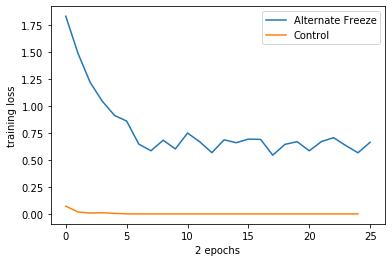

In [36]:
plt.plot(trainingloss)
plt.plot(trainingloss2)
plt.legend(["Alternate Freeze", "Control"])
plt.xlabel("2 epochs")
plt.ylabel("training loss")
plt.savefig('large_param_large_set_training_loss')

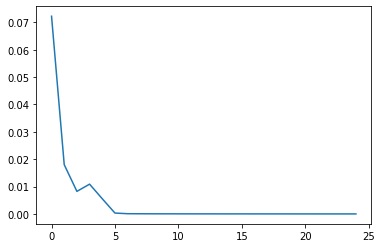

In [28]:
plt.plot(trainingloss2)
plt.savefig('true_large_param_m_t.png')

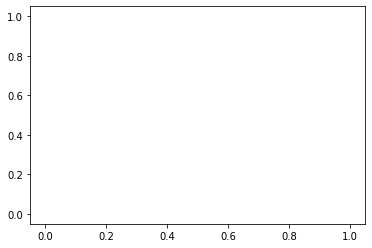

In [25]:
plt.plot(validationloss2)
plt.savefig('true_large_param_b_v.png')

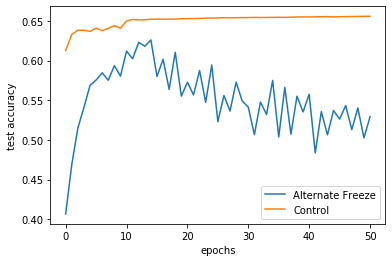

In [35]:
plt.plot(testaccuracy)
plt.plot(testaccuracy2)
plt.legend(["Alternate Freeze", "Control"])
plt.xlabel("epochs")
plt.ylabel("test accuracy")
plt.savefig('large_param_large_set_test_accuracy')

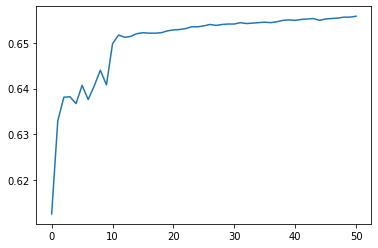

In [26]:
plt.plot(testaccuracy2)
plt.savefig('true_large_param_m_test.png')